#High Level Statistical Analysis

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 

haberman=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/haberman.csv")
print(haberman.head())
print("================")
print("shape of data set:",haberman.shape)
print("================")
print("coolumns of datasets:",haberman.columns)
print("================")
haberman.status=haberman.status.map({1:'survive',2:'die'})
print("================")
print("value count: ")
print(haberman["status"].value_counts())
print("================")

print(haberman.describe())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
shape of data set: (306, 4)
coolumns of datasets: Index(['age', 'year', 'nodes', 'status'], dtype='object')
value count: 
survive    225
die         81
Name: status, dtype: int64
              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


**Observation(s):** 


1.class label status has counts i.e  survive=225 and die =81,so that dataset is imbalanced

2.from percentiles, out of total observation, 25% have node= 0 and 50% of total has less that equal to node count as 1(node<=1).

3.age , year and nodes are 3 feature to predict the *status*

4.DATASET contain 306 points and 1 class label .



---



#SCATTER PLOTS

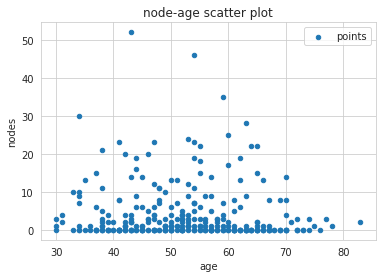

In [18]:
haberman.plot(kind='scatter',x="age",y="nodes",label='points')
plt.title("node-age scatter plot")
plt.legend()
plt.show()

*obervation*


1.points are crowded at node =0 ,so cannot predict anything accurately

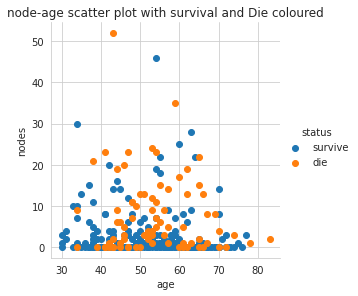

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age","nodes") \
   .add_legend();
plt.title("node-age scatter plot with survival and Die coloured")   

plt.show();
plt.close()

*observation*


here we can see all points are crowded at node =0 .survival and die points are easily visible here as they are coloured .

but we cannot conclude anything here that the patient will survive or not as we cannot observe any pattern .


so we can make pair plots and compare each pair of feature 


#PAIR PLOT

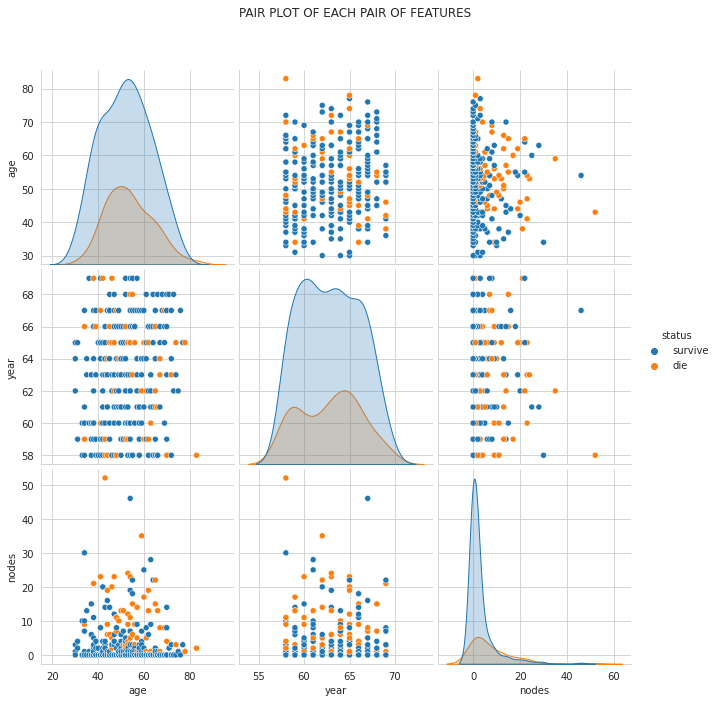

In [16]:
sns.set_style('whitegrid')
k=sns.pairplot(haberman,hue='status',size=3)
k.fig.suptitle("PAIR PLOT OF EACH PAIR OF FEATURES", y=1.08)

plt.show()

*observation*:


here in pair plot points(row1,column3)age-node are well seperated.
here in Age-nodes graph we can see that as age increases number of nodes decreases. so Age-nodes  graph is very usefull insight here .

#PDF and CDF


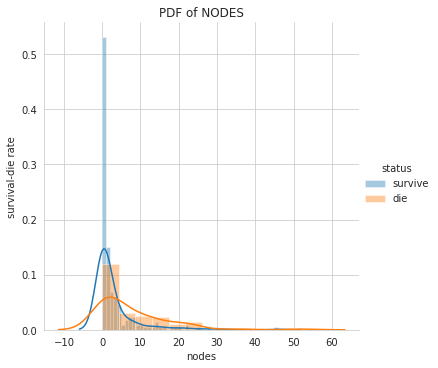

In [23]:
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot, 'nodes') \
  .add_legend()
plt.ylabel("survival-die rate")  
plt.title("PDF of NODES")

plt.show()




*observation*:


1.from the above plot we can conclude that person with less than 10 nodes have high chances of survival


2.people having more than 20 nodes have less chances of survival 

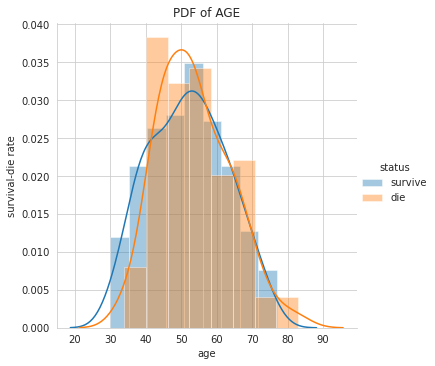

In [24]:
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot, 'age') \
  .add_legend()
plt.ylabel("survival-die rate")   
plt.title("PDF of AGE")
plt.show()

*observation*:

1. As both the PDF are overlapped, we cannot conlude much about age.


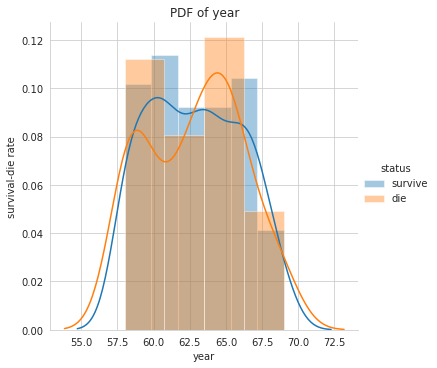

In [25]:

sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot, 'year') \
  .add_legend()
plt.ylabel("survival-die rate")     
plt.title("PDF of year")

plt.show()

*observation*

1.here also both the curve are overlapping ,so  cannot conclude much about it

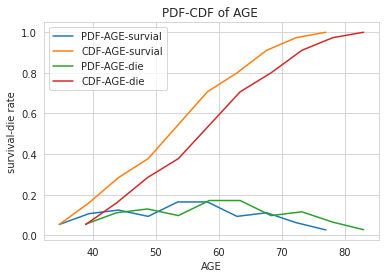

In [45]:
haberman_survival=haberman.loc[haberman['status']=="survive"]
haberman_die=haberman.loc[haberman['status']=="die"]


count1,bin1=np.histogram(haberman_survival['age'],bins=10,density=True)
count2,bin2=np.histogram(haberman_die['age'],bins=10,density=True)
PDF1=count1/sum(count1)
PDF2=count1/sum(count2)
CDF1=np.cumsum(PDF)
CDF2=np.cumsum(PDF)
plt.plot(bin1[1:],PDF1,label="PDF-AGE-survial")
plt.plot(bin1[1:],CDF1,label="CDF-AGE-survial")
plt.plot(bin2[1:],PDF2,label="PDF-AGE-die")
plt.plot(bin2[1:],CDF2,label="CDF-AGE-die")
plt.xlabel("AGE")
plt.legend()
plt.ylabel("survival-die rate")
plt.title("PDF-CDF of AGE ")
plt.show()         

*obervations*:


over 80 percentage of points has AGE less than 70.


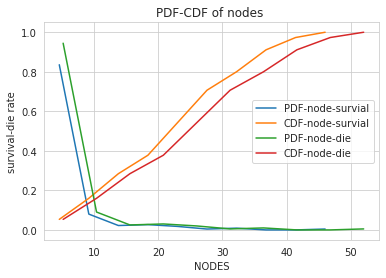

In [44]:
haberman_survival=haberman.loc[haberman['status']=="survive"]
haberman_die=haberman.loc[haberman['status']=="die"]


count1,bin1=np.histogram(haberman_survival['nodes'],bins=10,density=True)
count2,bin2=np.histogram(haberman_die['nodes'],bins=10,density=True)
PDF1=count1/sum(count1)
PDF2=count1/sum(count2)
CDF1=np.cumsum(PDF)
CDF2=np.cumsum(PDF)
plt.plot(bin1[1:],PDF1,label="PDF-node-survial")
plt.plot(bin1[1:],CDF1,label="CDF-node-survial")
plt.plot(bin2[1:],PDF2,label="PDF-node-die")
plt.plot(bin2[1:],CDF2,label="CDF-node-die")
plt.xlabel("NODES")
plt.ylabel("survival-die rate")
plt.legend()
plt.title("PDF-CDF of nodes ")
plt.show()   

*obervation*:

most of the people have less than 10 nodes.

death rate is more if age greated than approx 45 AGE

#BOXPLOT and VIOLIN PLOT


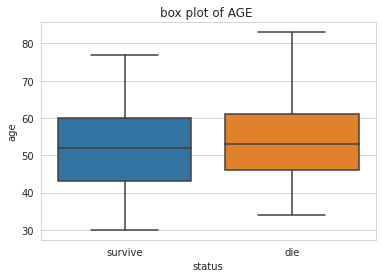

In [53]:
sns.set_style("whitegrid")
sns.boxplot(x='status',y='age',data=haberman)
plt.title("box plot of AGE ")
plt.show()

*observation*:



1. 25 percentile of survive is approxomately 43 years and  die is 46 years approximately 
2. 50 percentile of survivr is  53years approx and that of die is 54 years
3. 75 percentile of survive is  60 years approx  and  die  is 61 years.


both the plot overlap ,so we cannot conclude anything.

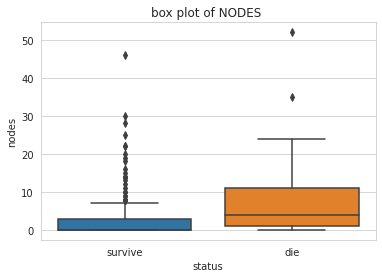

In [51]:
sns.set_style("whitegrid")
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title("box plot of NODES ")
plt.show()

*observation*

1.75 percentile of survive is approx3 and die is 11


2.50 percentile of survive is 0 and die is approx 3

here we can conclude that as number of nodes increases survival rate decreases,



but we cannot perfectly as both plot overlap eachother  

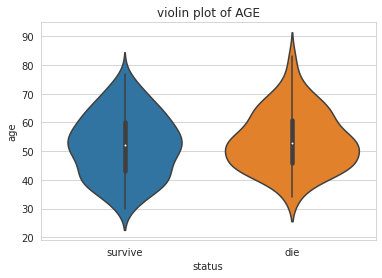

In [54]:
sns.set_style("whitegrid")
sns.violinplot(x='status',y='age',data=haberman)
plt.title("violin plot of AGE")

plt.show()

*observation*

both plot are mostly overlapping ,so cannot conclude anything here 

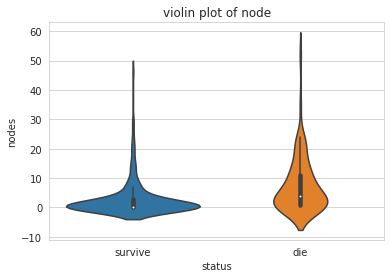

In [55]:
sns.set_style("whitegrid")
sns.violinplot(x='status',y='nodes',data=haberman)
plt.title("violin plot of node")
plt.show()

*observation*:

1. here we can say that at node =0 its wider, so survival rate in higher when node =0

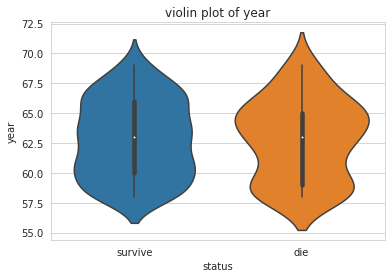

In [52]:
sns.set_style("whitegrid")
sns.violinplot(x='status',y='year',data=haberman)
plt.title("violin plot of year")
plt.show() 

*observation*:


1.here both plot overlap mostly .

soe we cannot intrepret any thing here 


#conclusion:#


1.cannot say with high probablity of a survival rate  of a person as the dataset in imbalanced

2.from the 3 features , nodes is the most important feature to decide survival rate.

3.person having less than equal to approx 4 nodes have high survival rate.


4.to classify survival rate of any new people is risky ,as dataset is imbalanced.


5.number of nodes is inverserly proportional to survival, but we cannot say that people with less nodes will always survive
